In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix #http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline
from itertools import combinations

In [124]:
df = pd.read_csv('loan.csv', index_col=0)

In [110]:
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [125]:
df['approved'] = df['Interest.Rate'] <= 12

In [112]:
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,approved
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False
13,21.67,670,60,14166.67,28000,False
21,21.98,665,36,6666.67,22000,False


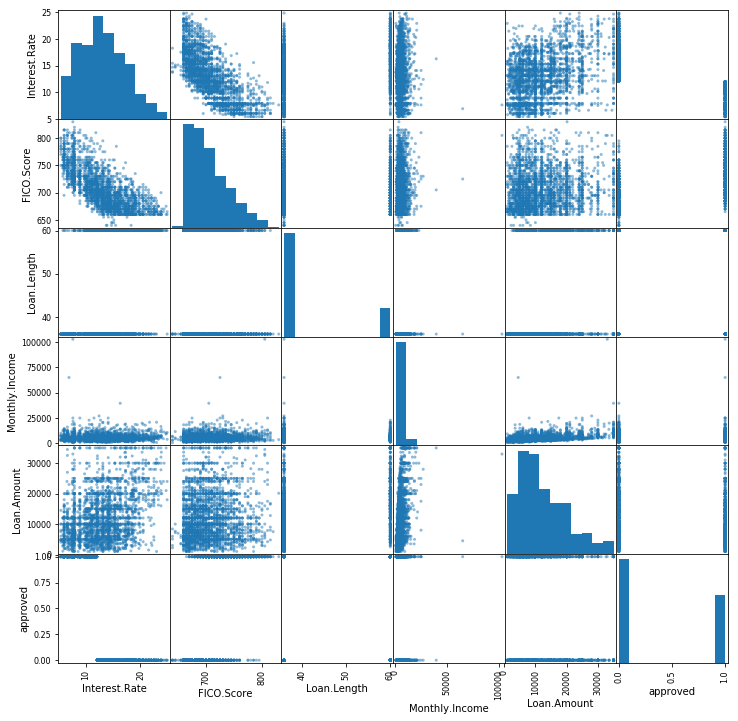

In [113]:
scatter_matrix(df, figsize=(12,12)) # Look at top row, Interest Rate.  FICO score looks the best
None 

In [114]:
y = df.approved
X = df[['FICO.Score']]

In [115]:
X.head() # Just to see what is in X

,FICO.Score
6,670
11,670
12,665
13,670
21,665


In [116]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=42) # Create our split

In [117]:
model = LogisticRegression().fit(X_train, y_train) # Our model

In [118]:
model.score(X_test, y_test) # We were right 76 percent of the time.
# TN(turned down loan correctly) + TP(approved load correctly) / TN + TP + FN + FP(all of the values)  - This is accuracy
# TN = True Negative, TP = True Positive, FN = False Negative, FP = False Positive

0.76319999999999999

In [119]:
model.coef_

array([[ 0.0207907]])

In [120]:
model.intercept_

array([-15.09796244])

In [106]:
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,approved
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False
13,21.67,670,60,14166.67,28000,False
21,21.98,665,36,6666.67,22000,False


In [127]:
df= df.dropna() # There is a row in here that has a Nan value.  This drops that row.

In [133]:
df.info() # This shows what is in the dataframe.  If one of the columns shows less than the others then you might have a Nan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 6 to 2497
Data columns (total 6 columns):
Interest.Rate     2499 non-null float64
FICO.Score        2499 non-null int64
Loan.Length       2499 non-null int64
Monthly.Income    2499 non-null float64
Loan.Amount       2499 non-null int64
approved          2499 non-null bool
dtypes: bool(1), float64(2), int64(3)
memory usage: 199.6 KB


In [132]:
y = df.approved
rows = []
for i in range(1,5):
    combos = list(combinations(['FICO.Score', 'Loan.Length', 'Monthly.Income', 'Loan.Amount'],i))
    for combo in combos:
        model = LogisticRegression(fit_intercept=True) # Turn this on or off to see which creates a better score
        accuracy = cross_val_score(model, df[list(combo)], df.approved, cv=10, scoring='accuracy').mean()
        rows.append({'Accuracy': accuracy, 'Columns': combo})
df1 = pd.DataFrame(rows)
pd.options.display.max_colwidth = 100
df1

,Accuracy,Columns
0,0.765154,"(FICO.Score,)"
1,0.603441,"(Loan.Length,)"
2,0.603040,"(Monthly.Income,)"
3,0.603441,"(Loan.Amount,)"
4,0.837152,"(FICO.Score, Loan.Length)"
5,0.603441,"(FICO.Score, Monthly.Income)"
6,0.622307,"(FICO.Score, Loan.Amount)"
7,0.605836,"(Loan.Length, Monthly.Income)"
8,0.603441,"(Loan.Length, Loan.Amount)"
9,0.612294,"(Monthly.Income, Loan.Amount)"


In [134]:
m1 = LogisticRegression().fit(df[['FICO.Score']],df.approved)

In [135]:
m1.coef_

array([[ 0.02417872]])

In [136]:
m1.intercept_

array([-17.48849485])

In [137]:
m1.predict? # This gives you the help

In [139]:
m1.predict([[300]]) # Can I get a 12% loan with a 300 FICO score?  No

array([False], dtype=bool)

In [140]:
m1.predict([[750]]) # With 750, then yes

array([ True], dtype=bool)

In [141]:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#Confusion Matrix
y_actual = df.approved # Actual approved
X = df[['FICO.Score']]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)#Splitting the data and training

In [143]:
y_hat = m1.predict(X_test) # Predictions

In [144]:
confusion_matrix(y_test, y_hat) #473 = True Negative, 37 = FP, 121 = FN, 194 = TP

array([[473,  37],
       [121, 194]], dtype=int64)

In [145]:
m1.score(X_test,y_test) # Accuracy
#Recall = 194/194+121 = 194/315 = 0.6158730158730159 tp/tp+fn
#Precision = 194/194 + 37 = 194/231 = 0.8398268398268398 tp/tp+fp

0.80848484848484847

In [151]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel() # This breaks out the numbers to show, tn, fp, fn, tp
print(tn,fp,fn,tp)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print(recall)
print(precision)

473 37 121 194
0.615873015873
0.839826839827
